## Multi Language Support in Azure Data Studio Notebooks

### Setup (what you need to get started):

1. Download Azure Data Studio
2. Get Free Azure Subscription
3. Login to Azure Portal
4. Create Azure SQL Database
5. Download SQL Server on your client and run this document there
6. Install separately Python and R on your localhost

Test Scenario:

1. We would like to test support for multi-language
2. Using **%%lang** command
3. Using sp\_execute\_external\_script
4. Staying on the same kernel all the time (SQL kernel)

## Test of multi-language support

In [13]:
SELECT * FROM sys.tables

(6 rows affected)

Total execution time: 00:00:00.068

name,object_id,principal_id,schema_id,parent_object_id,type,type_desc,create_date,modify_date,is_ms_shipped,is_published,is_schema_published,lob_data_space_id,filestream_data_space_id,max_column_id_used,lock_on_bulk_load,uses_ansi_nulls,is_replicated,has_replication_filter,is_merge_published,is_sync_tran_subscribed,has_unchecked_assembly_data,text_in_row_limit,large_value_types_out_of_row,is_tracked_by_cdc,lock_escalation,lock_escalation_desc,is_filetable,is_memory_optimized,durability,durability_desc,temporal_type,temporal_type_desc,history_table_id,is_remote_data_archive_enabled,is_external,history_retention_period,history_retention_period_unit,history_retention_period_unit_desc,is_node,is_edge
spt_fallback_db,117575457,NULL,1,0,U,USER_TABLE,2003-04-08 09:18:01.557,2019-09-24 14:23:14.273,1,0,0,0,NULL,8,0,1,0,0,0,0,0,0,0,0,0,TABLE,0,0,0,SCHEMA_AND_DATA,0,NON_TEMPORAL_TABLE,NULL,0,0,NULL,NULL,NULL,0,0
spt_fallback_dev,133575514,NULL,1,0,U,USER_TABLE,2003-04-08 09:18:02.870,2019-09-24 14:23:14.277,1,0,0,0,NULL,10,0,1,0,0,0,0,0,0,0,0,0,TABLE,0,0,0,SCHEMA_AND_DATA,0,NON_TEMPORAL_TABLE,NULL,0,0,NULL,NULL,NULL,0,0
spt_fallback_usg,149575571,NULL,1,0,U,USER_TABLE,2003-04-08 09:18:04.180,2019-09-24 14:23:14.280,1,0,0,0,NULL,9,0,1,0,0,0,0,0,0,0,0,0,TABLE,0,0,0,SCHEMA_AND_DATA,0,NON_TEMPORAL_TABLE,NULL,0,0,NULL,NULL,NULL,0,0
tbSeperate,343672272,NULL,1,0,U,USER_TABLE,2020-10-17 22:59:47.947,2020-10-17 22:59:47.947,0,0,0,0,NULL,1,0,1,0,0,0,0,0,0,0,0,0,TABLE,0,0,0,SCHEMA_AND_DATA,0,NON_TEMPORAL_TABLE,NULL,0,0,NULL,NULL,NULL,0,0
spt_monitor,1803153469,NULL,1,0,U,USER_TABLE,2019-09-24 14:21:40.837,2019-09-24 14:23:14.290,1,0,0,0,NULL,11,0,1,0,0,0,0,0,0,0,0,0,TABLE,0,0,0,SCHEMA_AND_DATA,0,NON_TEMPORAL_TABLE,NULL,0,0,NULL,NULL,NULL,0,0
MSreplication_options,2107154552,NULL,1,0,U,USER_TABLE,2019-09-24 14:22:51.377,2019-09-24 14:23:14.290,1,0,0,0,NULL,6,0,0,0,0,0,0,0,0,0,0,0,TABLE,0,0,0,SCHEMA_AND_DATA,0,NON_TEMPORAL_TABLE,NULL,0,0,NULL,NULL,NULL,0,0


Switching to Python

In [12]:
%%lang_py 

we = 4234


: Msg 102, Level 15, State 1, Line 1
Incorrect syntax near '%'.

Total execution time: 00:00:00

In [7]:
%%lang_r
a <- 44
print(a)

STDOUT message(s) from external script: 
[1] 44

Total execution time: 00:00:00.333

In [5]:
import random

In [6]:
exec sp_Execute_external_script
@language = N'Python'
,@script = N'
import random
OutputDataSet = random.randint(0,9)'


: Msg 39004, Level 16, State 20, Line 0
A 'Python' script error occurred during execution of 'sp_execute_external_script' with HRESULT 0x80004004.

: Msg 39019, Level 16, State 2, Line 0
An external script error occurred: 

Error in execution.  Check the output for more information.
Traceback (most recent call last):
  File "<string>", line 5, in <module>
  File "C:\ProgramData\MSSQLSERVER2019\Temp-PY\Appcontainer1\BECC7166-662E-4C45-9092-1A34631C09D4\sqlindb_0.py", line 33, in transform
    raise TypeError('OutputDataSet should be of type pandas.DataFrame')
TypeError: OutputDataSet should be of type pandas.DataFrame

SqlSatelliteCall error: Error in execution.  Check the output for more information.

STDOUT message(s) from external script: 
SqlSatelliteCall function failed. Please see the console output for more information.
Traceback (most recent call last):
 File "C:\Program Files\Microsoft SQL Server\MSSQL15.MSSQLSERVER2019\PYTHON_SERVICES\lib\site-packages\revoscalepy\computecontext\RxInSqlServer.py", line 605, in rx_sql_satellite_call
 rx_native_call("SqlSatelliteCall", params)
 File "C:\Program Files\Microsoft SQL Server\MSSQL15.MSSQLSERVER2019\PYTHON_SERVICES\lib\site-packages\revoscalepy\RxSerializable.py", line 375, in rx_native_call
 ret = px_call(functionname, params)
RuntimeError: revoscalepy function failed.

Total execution time: 00:00:03.786

Non of this has worked! In addition, you will need to install the Machine Learning extension for Azure Data Studio:

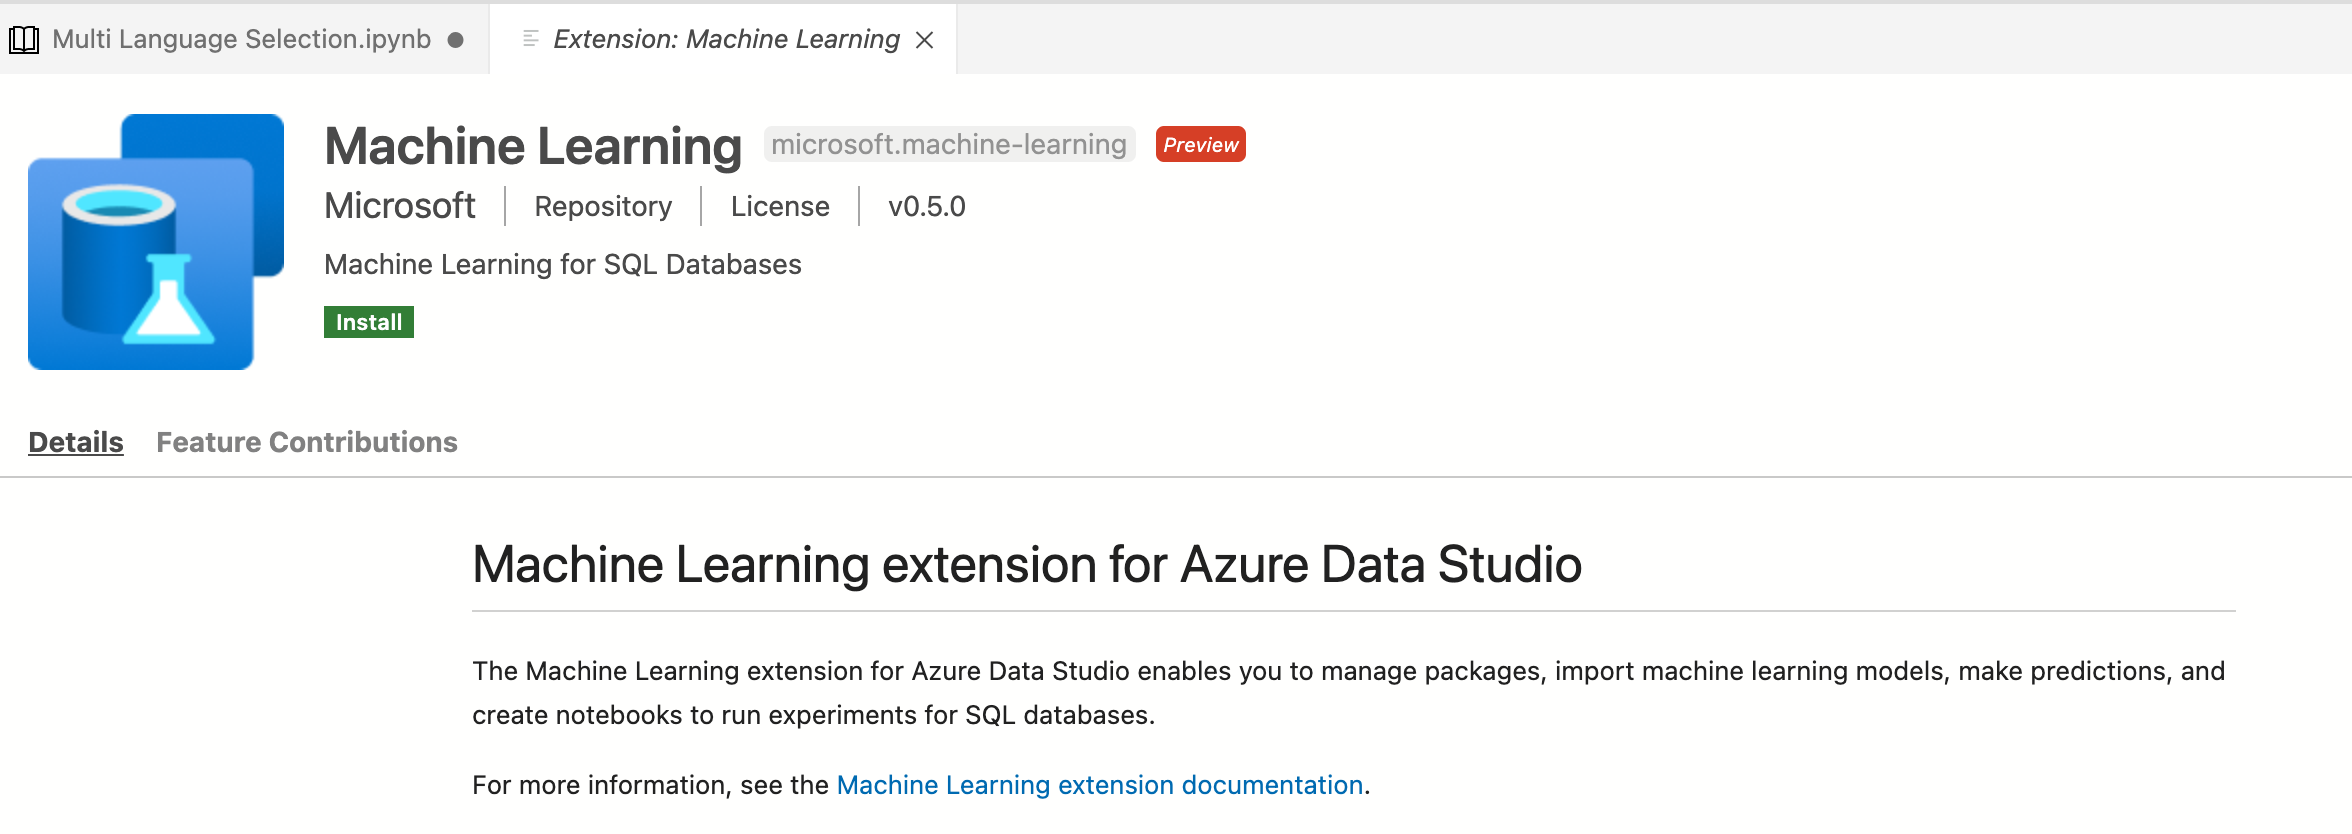<br>

Once you have this installed, go to View -\> Extentions and select the extention "Machine LEarning" and click the setting wheel. Or, go to Preferences and select Extensions -\> Machine Learning.

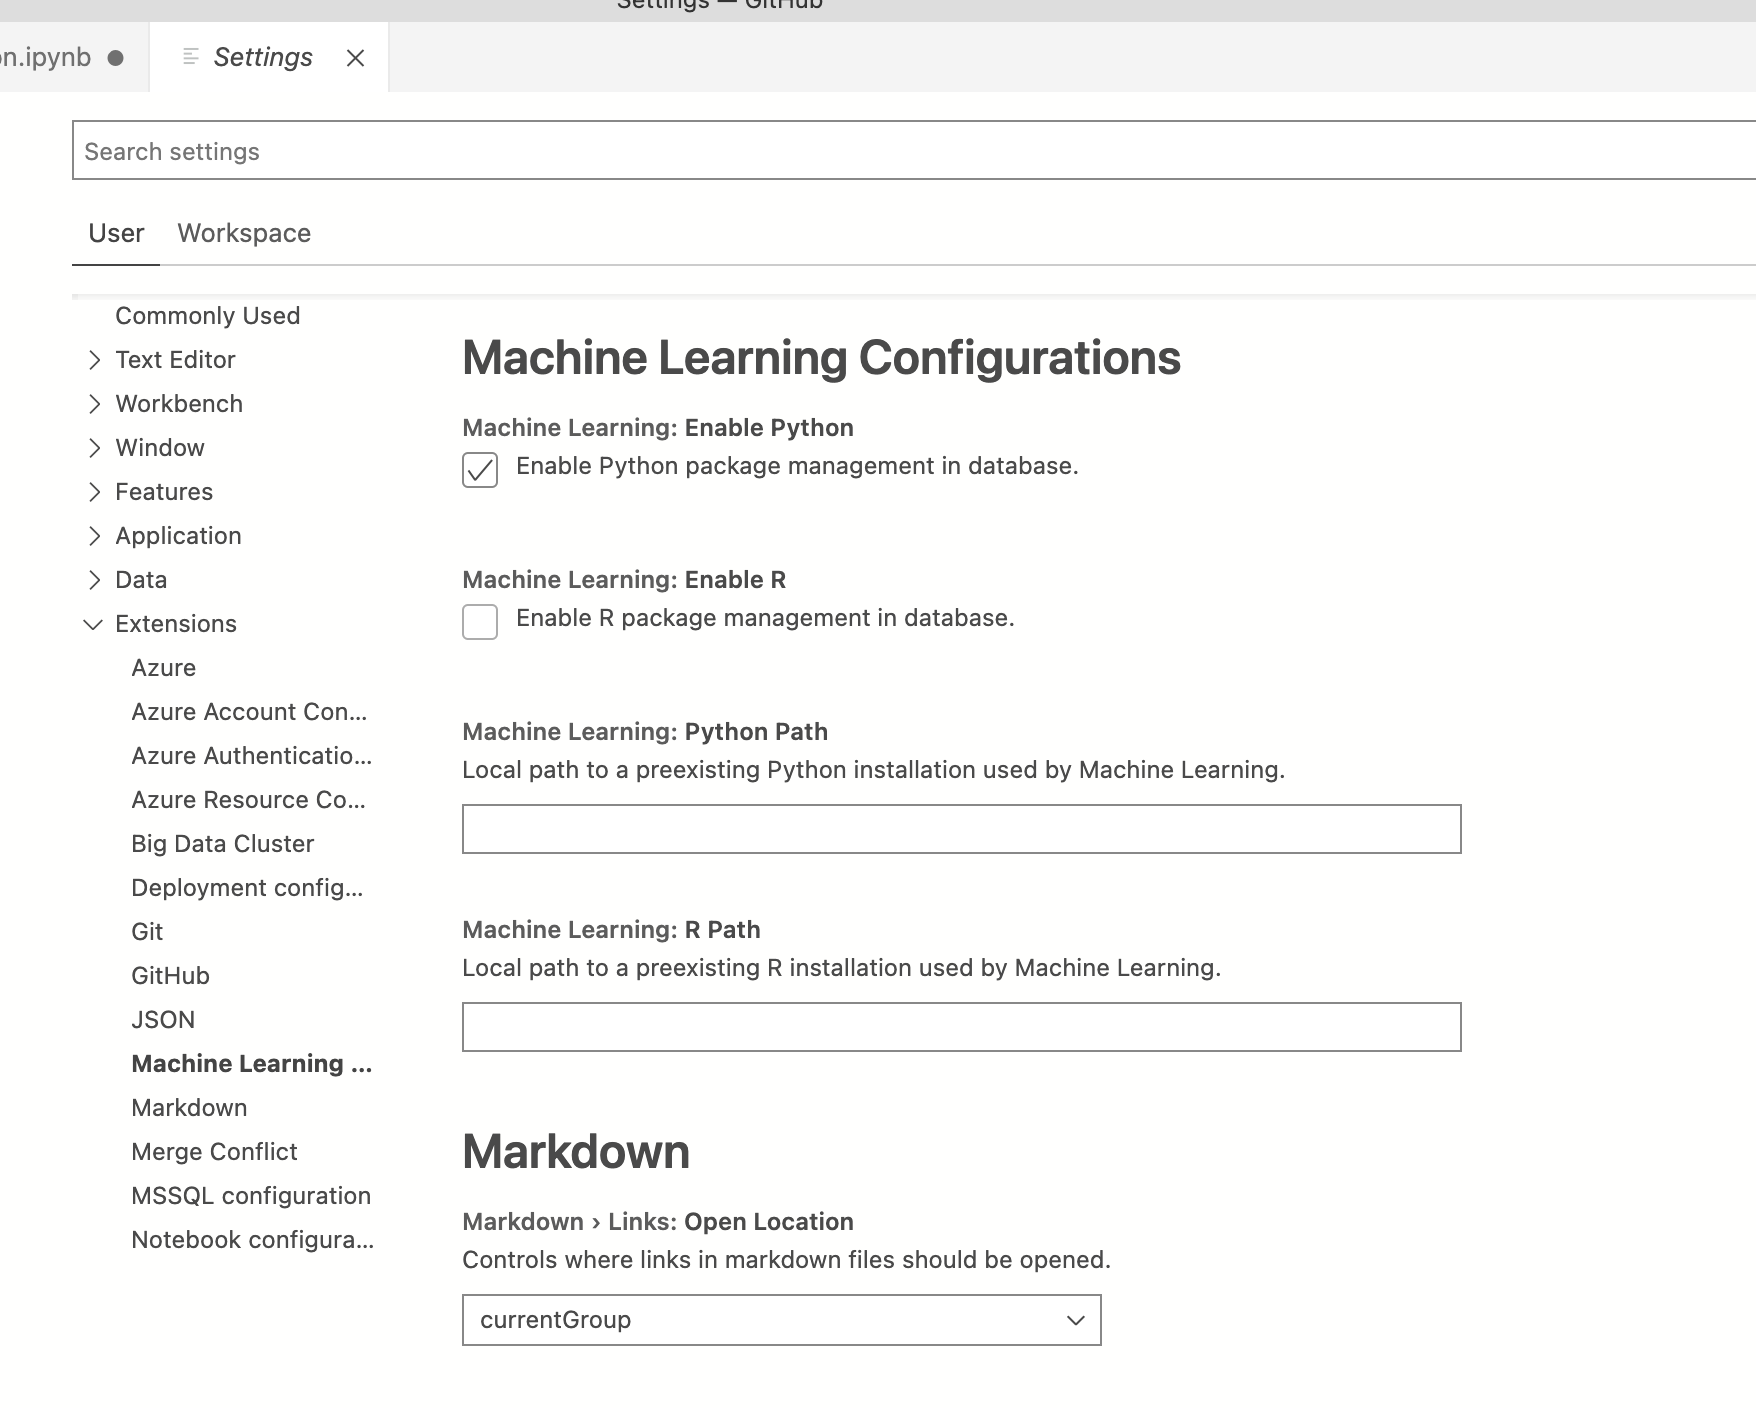<br>

Enable both Python and R by checking the box and In addition, type in the path to R and Pyhon.

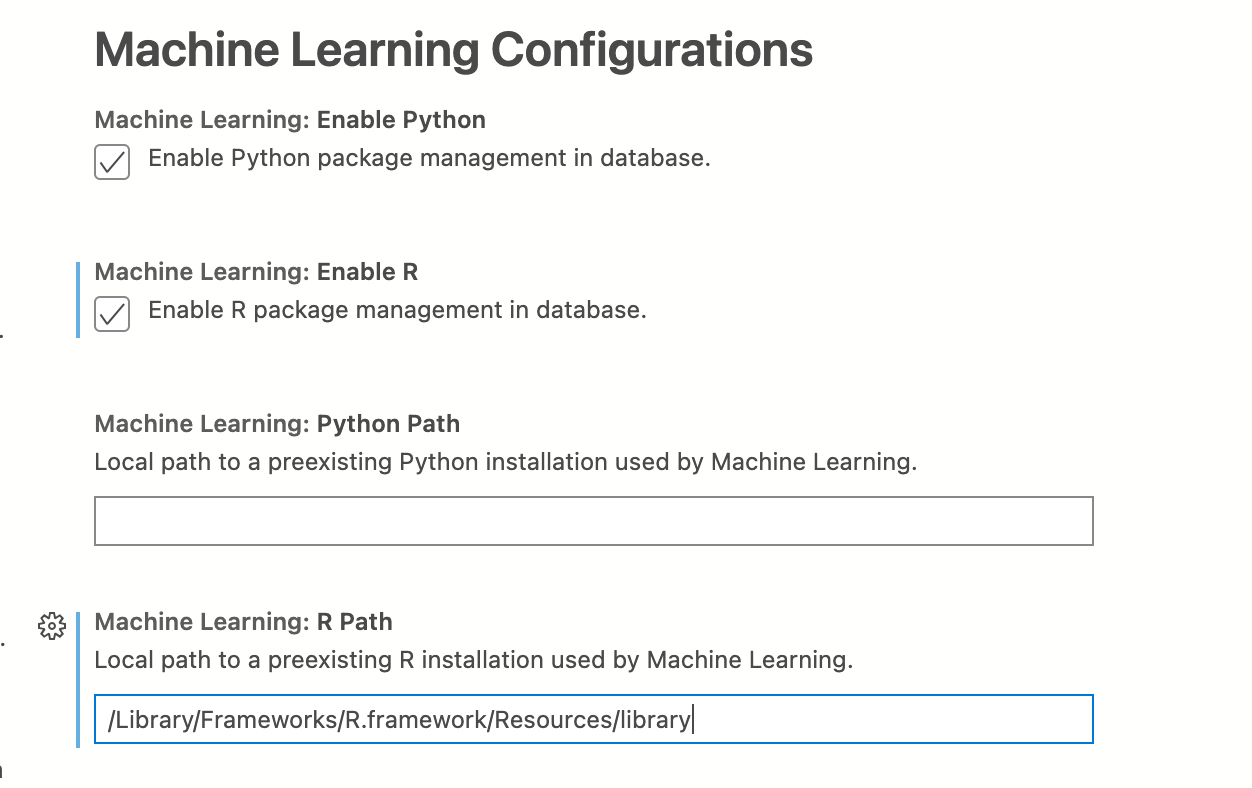<br>

Now you can easily start using %%lang pointer.

In [ ]:
%%lang_r
a <- 44
print(a)